# Genre Movies Classification 

- multiClass classification 
- based on sinopsis  

<br>

- urutan kata dalam kalimat diperhatikan
- using LSTM (Long-Short Term Memory)

1. Import Dataset

- drop judul column

In [3]:
    import pandas as pd
    df = pd.read_csv('/tmp/imdb_indonesian_movies_2.csv')
    df = df.drop(columns=['judul_film'])

- show first five dataset

In [4]:
df.head()

,ringkasan_sinopsis,genre
0,Raden Mas Said putra sulung Tumenggung Wilarik...,Drama
1,Soe Hok Gie adalah seorang aktivis yang hidup ...,Drama
2,Guru Bangsa Tjokroaminoto menceritakan tentang...,Drama
3,POL menceritakan kisah hidup yang luar biasa d...,Drama
4,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,Drama


2.  Data Preparation

- change categorical value into numeric

  - because our label is categorical so we have to change it into numeric using ``one-hot-encoding`` 
  - then make new dataframe (drop column genre, add column of each categori )

In [5]:
    category = pd.get_dummies(df.genre)
    df_baru = pd.concat([df, category], axis=1)
    df_baru = df_baru.drop(columns='genre')
    df_baru

,ringkasan_sinopsis,Drama,Horor,Komedi,Laga,Romantis
0,Raden Mas Said putra sulung Tumenggung Wilarik...,1,0,0,0,0
1,Soe Hok Gie adalah seorang aktivis yang hidup ...,1,0,0,0,0
2,Guru Bangsa Tjokroaminoto menceritakan tentang...,1,0,0,0,0
3,POL menceritakan kisah hidup yang luar biasa d...,1,0,0,0,0
4,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,1,0,0,0,0
...,...,...,...,...,...,...
1000,Winter in Tokyo berpusat pada kehidupan Ishida...,0,0,0,0,1
1001,Markonah melarikan diri ke Jakarta karena akan...,0,0,0,0,1
1002,"Tempat aking lebih dari 36 jam, Last Night ada...",0,0,0,0,1
1003,Proyek baru ini adalah tentang seorang lelaki ...,0,0,0,0,1


- split attribute and label

  - in order data can be processed by model, we have to change it into (datafram->array)

In [6]:
    sinopsis = df_baru['ringkasan_sinopsis'].values
    label = df_baru[['Drama', 'Horor', 'Komedi', 'Laga', 'Romantis']].values

- split data training and data testing

In [7]:
    from sklearn.model_selection import train_test_split
    sinopsis_latih, sinopsis_test, label_latih, label_test = train_test_split(sinopsis, label, test_size=0.2)

In [16]:
print(tokenizer.word_index)

{'x': 4331, 'yang': 2, 'dan': 3, 'di': 4, 'dengan': 5, 'untuk': 6, 'mereka': 7, 'dari': 8, 'itu': 9, 'tidak': 10, 'ia': 11, 'seorang': 12, 'ke': 13, 'karena': 14, 'ini': 15, 'oleh': 16, 'dalam': 17, 'menjadi': 18, 'adalah': 19, 'anak': 20, 'pada': 21, 'dia': 22, 'sebuah': 23, 'orang': 24, 'juga': 25, 'tersebut': 26, 'rumah': 27, 'ketika': 28, 'membuat': 29, 'sebagai': 30, 'namun': 31, 'bahwa': 32, 'saat': 33, 'tak': 34, 'cinta': 35, 'film': 36, 'akhirnya': 37, 'tentang': 38, 'setelah': 39, 'ternyata': 40, 'satu': 41, 'bisa': 42, 'akan': 43, 'kemudian': 44, 'ada': 45, 'teman': 46, 'harus': 47, 'gadis': 48, 'pun': 49, 'sudah': 50, 'kembali': 51, 'bernama': 52, 'selalu': 53, 'bersama': 54, 'memiliki': 55, 'tetapi': 56, 'hal': 57, 'sangat': 58, 'tahun': 59, 'telah': 60, 'hari': 61, 'wanita': 62, 'lain': 63, 'hingga': 64, 'baru': 65, 'hidup': 66, 'sendiri': 67, 'keluarga': 68, 'ingin': 69, 'tapi': 70, 'suatu': 71, 'berhasil': 72, 'bertemu': 73, 'semua': 74, 'mencari': 75, 'lalu': 76, 'kepad

3. tokenization

- convert each kata in sentences to certain numeric in order to make text are understood by model

- ``Tokenizer(num_words=5000, oov_token='x')`` 
  - num_words : parameter jumlah kata yang akan ditokenisasi (5000 artinya only 5000 kata yg paling sering muncul yg akan dikonversi dari seluruh kata pada dataset) 

  - as default num_words is none but this parameter link with model performance so the best way to determine num_words `` len(tokenizer.word_index) + 1`` or half of len

  - oov_token : parameter yg berfungsi mengganti kata-kata yang tidak ditokenisasi into certain character. lebih baik mengganti unknown words with  certain word than informasi hilang because melewatkan that words 

- after that we change text into sequence using ``texts_to_sequences``

- then using ``pad_sequences`` to make each 
sequences have same length

In [8]:
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.preprocessing.sequence import pad_sequences
     
    # tokenization
    tokenizer = Tokenizer(num_words=5000, oov_token='x')
    tokenizer.fit_on_texts(sinopsis_latih) 
    tokenizer.fit_on_texts(sinopsis_test)
     
    # change text to sequences
    sekuens_latih = tokenizer.texts_to_sequences(sinopsis_latih)
    sekuens_test = tokenizer.texts_to_sequences(sinopsis_test)
     
    # make sequence have same lenght
    padded_latih = pad_sequences(sekuens_latih) 
    padded_test = pad_sequences(sekuens_test)

In [14]:
len(tokenizer.word_index) + 1

13678

4. Build model

  1. input layer (2)
    - using embedding layer (make ML Model understand meaning words), input shape : 5000, dimensions: 16
    - using LSTM with parameter output : 64 (make ML Model understand meaning words based on urutan kata)
  2. Hidden layer (2)
    - 24 perceptron, relu activation
  3. Output layer 
    - 5 output 
 

In [24]:
    import tensorflow as tf
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
        tf.keras.layers.LSTM(64),
        # tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])
    
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

- before model ready to train. it need several setting again. this add in compile stage

In [25]:
    num_epochs = 30
    history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                        validation_data=(padded_test, label_test), verbose=2)

Epoch 1/30
26/26 - 30s - loss: 1.6104 - accuracy: 0.1791 - val_loss: 1.6101 - val_accuracy: 0.2139 - 30s/epoch - 1s/step
Epoch 2/30
26/26 - 27s - loss: 1.6078 - accuracy: 0.2139 - val_loss: 1.6103 - val_accuracy: 0.2289 - 27s/epoch - 1s/step
Epoch 3/30
26/26 - 29s - loss: 1.5792 - accuracy: 0.3085 - val_loss: 1.6182 - val_accuracy: 0.2537 - 29s/epoch - 1s/step
Epoch 4/30
26/26 - 27s - loss: 1.3761 - accuracy: 0.3955 - val_loss: 1.5555 - val_accuracy: 0.2886 - 27s/epoch - 1s/step
Epoch 5/30
26/26 - 26s - loss: 1.0294 - accuracy: 0.5634 - val_loss: 1.8639 - val_accuracy: 0.2637 - 26s/epoch - 1s/step
Epoch 6/30
26/26 - 26s - loss: 0.8242 - accuracy: 0.6704 - val_loss: 1.8979 - val_accuracy: 0.3234 - 26s/epoch - 1s/step
Epoch 7/30
26/26 - 26s - loss: 0.4464 - accuracy: 0.8470 - val_loss: 2.5131 - val_accuracy: 0.2985 - 26s/epoch - 1s/step
Epoch 8/30
26/26 - 26s - loss: 0.2111 - accuracy: 0.9428 - val_loss: 3.2621 - val_accuracy: 0.2687 - 26s/epoch - 1s/step
Epoch 9/30
26/26 - 27s - loss: 0

5. evaluation model

In [26]:
model.evaluate(padded_test, label_test)

7/7 [==============================] - 1s 148ms/step - loss: 8.0393 - accuracy: 0.2935


[8.039322853088379, 0.2935323417186737]

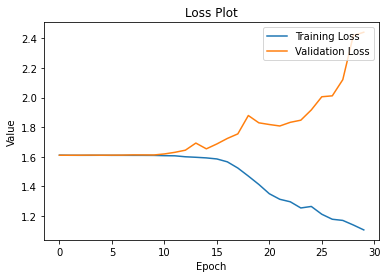

In [22]:
from matplotlib import pyplot as plt
#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

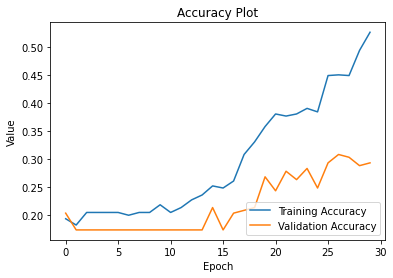

In [23]:
#accuracy train & validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

6. Save Model

In [13]:
import joblib

joblib.dump(model,"/tmp/modelMoviesGenreClassification.pkl")

INFO:tensorflow:Assets written to: ram://c9716114-3358-4502-9156-b544ec639024/assets


INFO:tensorflow:Assets written to: ram://c9716114-3358-4502-9156-b544ec639024/assets


['/tmp/modelMoviesGenreClassification.pkl']

7. Make Prediction

In [33]:
import numpy as np

#define labels
labels = ['Drama','Horor','Komedi','Laga','Romantis']

test_y = label_latih[5]

# print(y)
print( labels[np.argmax(test_y)] )

Horor


In [36]:
sinopsis_latih[5]

'Anggun (Devi Ivonne) yang mendalami ilmu hitam untuk melampiaskan nafsu setannya selalu mencari korban gadis-gadis cantik untuk sesaji. Ayu (Hazni Zulaikah H) yang hendak menyelamatkannya dari dunia hitam malah hampir menjadi korban. Untung hadir Iman (Harry Capri) sebuah sosok gaib tapi manusia yang membantu Ayu. Anggun akhirnya mati karena ledakan yang datang dari langit.'

In [37]:
padded_latih[5]

array([   0,    0,    0, ...,   99,    8, 1749], dtype=int32)

In [45]:
len(padded_latih[5])

1765

In [35]:
scores = model.predict(padded_latih)[5]
 
# print(y)
print( labels[np.argmax(scores)] )

Horor


In [46]:
# data input
text = ['Anggun (Devi Ivonne) yang mendalami ilmu hitam untuk melampiaskan nafsu setannya selalu mencari korban gadis-gadis cantik untuk sesaji. Ayu (Hazni Zulaikah H) yang hendak menyelamatkannya dari dunia hitam malah hampir menjadi korban. Untung hadir Iman (Harry Capri) sebuah sosok gaib tapi manusia yang membantu Ayu. Anggun akhirnya mati karena ledakan yang datang dari langit.']

# preprocessing

# 1. tokenisation
sequences = tokenizer.texts_to_sequences(text)

print('word index')
print(tokenizer.word_index)

# 2. change into sequence
var_txt = tokenizer.texts_to_sequences(text)

print('\n text disesuaikan dengan index')
print(var_txt)

# 3. make input have same lenght
sequences_samapanjang = pad_sequences(var_txt, 
                                          padding='pre',
                                          maxlen=1765)

print('\n disamakan pangjangnya dengan model')
print(sequences_samapanjang)

#do prediction
scores = model.predict(sequences_samapanjang)[0]

print('\n hasil prediction')
 
print( labels[np.argmax(scores)] )
# print(np.round(scores,0))

# print('\n sesuaikan dengan label')

# print(y_test[5])
# print(kalimat_test[5])

word index
{'x': 4331, 'yang': 2, 'dan': 3, 'di': 4, 'dengan': 5, 'untuk': 6, 'mereka': 7, 'dari': 8, 'itu': 9, 'tidak': 10, 'ia': 11, 'seorang': 12, 'ke': 13, 'karena': 14, 'ini': 15, 'oleh': 16, 'dalam': 17, 'menjadi': 18, 'adalah': 19, 'anak': 20, 'pada': 21, 'dia': 22, 'sebuah': 23, 'orang': 24, 'juga': 25, 'tersebut': 26, 'rumah': 27, 'ketika': 28, 'membuat': 29, 'sebagai': 30, 'namun': 31, 'bahwa': 32, 'saat': 33, 'tak': 34, 'cinta': 35, 'film': 36, 'akhirnya': 37, 'tentang': 38, 'setelah': 39, 'ternyata': 40, 'satu': 41, 'bisa': 42, 'akan': 43, 'kemudian': 44, 'ada': 45, 'teman': 46, 'harus': 47, 'gadis': 48, 'pun': 49, 'sudah': 50, 'kembali': 51, 'bernama': 52, 'selalu': 53, 'bersama': 54, 'memiliki': 55, 'tetapi': 56, 'hal': 57, 'sangat': 58, 'tahun': 59, 'telah': 60, 'hari': 61, 'wanita': 62, 'lain': 63, 'hingga': 64, 'baru': 65, 'hidup': 66, 'sendiri': 67, 'keluarga': 68, 'ingin': 69, 'tapi': 70, 'suatu': 71, 'berhasil': 72, 'bertemu': 73, 'semua': 74, 'mencari': 75, 'lalu':